In [1]:
def eigendecomp(X):
    
    mean = np.mean(X, axis = 0)
    var = np.var(X, axis = 0)
    res = (X - mean) / np.sqrt(var)
    
    m = X.shape[0]
    cov = 1 / (m - 1) * np.dot(X.T, X)
    evals, evecs = np.linalg.eig(cov)
    idx = np.argsort(evals)[::-1]
    sorted_eig_vals = evals[idx]
    sorted_eig_vecs = evecs[:,idx]

    return sorted_eig_vals, sorted_eig_vecs

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pandas as pd

# read the original data file and split it into data and labels
df = pd.read_csv("Cleaned-Data.csv", header=0).drop(["Country"], axis=1)
labels = df.filter(["Severity_Mild", "Severity_Moderate",
                   "Severity_None", "Severity_Severe"], axis=1)
data = df.drop(labels, axis=1)
data = data.drop(['Gender_Female', 'Gender_Male','Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 
                  'Contact_Yes','None_Sympton', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
                  'Age_20-24', 'Age_25-59', 'Age_60+'], axis=1)
# change the labels to 0, 1, 2, 3 from the original
classes = []
for i in range(labels.shape[0]):
    mild = labels.iloc[i]["Severity_Mild"]
    moderate = labels.iloc[i]["Severity_Moderate"]
    healthy = labels.iloc[i]["Severity_None"]
    severe = labels.iloc[i]["Severity_Severe"]
    if mild == 1 and moderate == 0 and healthy == 0 and severe == 0:
        classes.append(1)
    if mild == 0 and moderate == 1 and healthy == 0 and severe == 0:
        classes.append(1)
    if mild == 0 and moderate == 0 and healthy == 1 and severe == 0:
        classes.append(0)
    if mild == 0 and moderate == 0 and healthy == 0 and severe == 1:
        classes.append(1)

classes = pd.DataFrame({"class": classes})

In [3]:
_, sorted_eig_vecs = eigendecomp(data)
new_data = np.dot(data, sorted_eig_vecs[:,:15])

result = pd.concat([pd.DataFrame(new_data), classes], axis=1)
# split data into train and test. We choose 20% as test and 80% as train
train, test = train_test_split(result, test_size=0.2, shuffle=True)

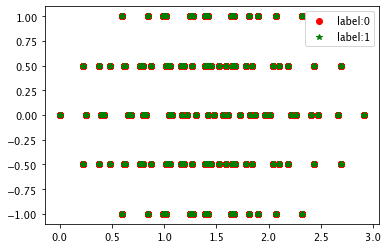

In [4]:
# visualize 
label = np.array(train['class'])
t1 = np.array(train[0]).reshape(-1, 1)
t2 = np.array(train[1]).reshape(-1, 1)
new = np.hstack((t1, t2))

plt.figure()
plt.plot(new[label == 0][:,0], new[label == 0][:,1], linestyle='', marker='o', label = 'label:0', c='r')
plt.plot(new[label == 1][:,0], new[label == 1][:,1], linestyle='', marker='*', label = 'label:1', c='g')
plt.legend()

In [5]:
print(new[label == 0][:,0].shape)
print(new[label == 1][:,0].shape)

(63459,)
(189981,)
